## Calculation Constants

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Blood Volume, Hematocrit, MCV of a RBC
BV_ss = 4.3
Ht_ss = 0.42
Ht_ds = 0.336
MCV_ss = float(90e-15)

# Set Blood Loss by PPH and needed time to correct
BV_loss = 1 #L
base_line_time_weeks = 5 # weeks per pint
pint_to_liter = 1/0.473176473

time_to_correct_weeks = base_line_time * pint_to_liter * BV_loss
time_to_correct_days = round(time_to_correct_weeks * 7) # 73.968 is the float
print(time_to_correct_days)

convert_min_to_day = 60 * 24

# Molar constants and Conversion Factors
Fe_molar = 55.845
Tf_molar = 79_000

Hg_count = float(270e6) # Literature
Hg_molar = 65_000 # g/mol, Da, Literature (Journal of Biological Chemistry)
heme_molar = 616.487 # g/mol, Literature 

Avogadro_num = float(6.022e23) # molecules / mol

heme_count = Hg_count * 4 # molecules heme per RBC
convert_num_heme_to_RBC = 1/heme_count
convert_mol_heme_to_RBC = 1/(heme_count/Avogadro_num) # mol heme per RBC



74


## SS

In [62]:
n3 = 3.22e-5
n4 = 2.69e-5
n5 = 2.65e-6
n6 = n5

print(f'{n4*Fe_molar + n6*(Tf_molar+2*Fe_molar) - n3*Fe_molar - n5*Tf_molar:.15f}')
print(n4*Fe_molar*1000)
print(n6*(Tf_molar+2*Fe_molar)*1000)
print(n3*Fe_molar*1000)
print(n5*Tf_molar*1000)

print(1.5+209.6-209.3-1.8)

0.000000000000000
1.5022305
209.64597849999998
1.7982089999999997
209.35
-1.709743457922741e-14


In [63]:
heme_flow_rate = 3.6e-4
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.1245300564596
193.48396379940218
0.0003586848223181667
0.00031384921952839584


### Blood Change: RBC

In [44]:
BV_ss = 4.3
Ht_ss = .42
plasma_volume_ss = BV_ss*(1-Ht_ss)
MCV = 90e-15
print(f'RBC total healthy:  {BV_ss*Ht_ss/MCV:,} ')

BV_temp = BV_ss-BV_loss # instant. blood loss
RBC_V_new = BV_temp*Ht_ss # new RBC volume
Ht_new = RBC_V_new/BV_ss # new hematocrit after filling with plasma


print(f'RBC total new:      {BV_ss*Ht_new/MCV:,}')
print(f'RBC diff:           {-BV_ss*Ht_new/MCV + BV_ss*Ht_ss/MCV:,}')
print(f'Ht new:             {Ht_new:.3f}')
print()
print(f'Plasma Vol old:     {BV_ss*(1-Ht_ss):.2f} L ')
print(f'Plasma Vol new:     {BV_ss*(1-Ht_new):.2f} L')
print(f'Plasma Vol change:  {-BV_ss*(1-Ht_ss) + BV_ss*(1-Ht_new):.2f} L')
print()
print(f'RBC Vol old:        {BV_ss*Ht_ss:.2f} L')
print(f'RBC Vol new:        {BV_ss*Ht_new:.2f} L')
print(f'RBC Vol change:     {BV_ss*Ht_new - BV_ss*Ht_ss:.2f} L')

plasma_V_old = BV_ss*(1-Ht_ss)
plasma_V_new = BV_ss*(1-Ht_new)

RBC total healthy:  20,066,666,666,666.664 
RBC total new:      15,400,000,000,000.0
RBC diff:           4,666,666,666,666.664
Ht new:             0.322

Plasma Vol old:     2.49 L 
Plasma Vol new:     2.91 L
Plasma Vol change:  0.42 L

RBC Vol old:        1.81 L
RBC Vol new:        1.39 L
RBC Vol change:     -0.42 L


## RBCs
$\dot{RBC} = \dot{Add} + \dot{Rem} $

In [103]:
#Specific Constants
plasma_initial = 2.91
plasma_final = 2.49


time_extra = 50
time_prior = -25
step_size = 1000*5
fractional_step_size = int((step_size / time_to_correct_days)*(time_extra))
time_extra = 50

t_ss_glimpse = np.linspace(time_prior, 0, int((step_size / time_to_correct_days)*(-time_prior)))
t_before = np.linspace(0, time_to_correct_days, step_size)
t_after = np.linspace(time_to_correct_days, (time_to_correct_days+time_extra), fractional_step_size)
t = np.concatenate((t_ss_glimpse, t_before, t_after), axis=0)

### Deg Kinetics


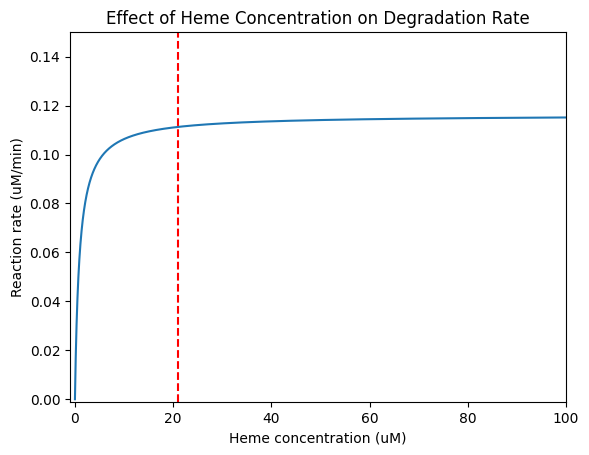

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Degradation
Km = 0.93 #uM
kcat = 3.5 #1/min
HO1 = 0.0332 # uM

Hem0 = np.arange(0, 100, 0.01)

v = np.zeros_like(Hem0) # initialize v array with zeros
for i in range(len(Hem0)):
    v[i] = (kcat * Hem0[i] * HO1) / (Km + Hem0[i])

plt.plot(Hem0, v)
plt.xlabel('Heme concentration (uM)')
plt.ylabel('Reaction rate (uM/min)')
plt.title('Effect of Heme Concentration on Degradation Rate')
plt.ylim(-0.001, 0.15)
plt.xlim(-1,100)
plt.axvline(x=21, color='r', linestyle='--')
plt.show() 

### Plasma Volume Func

Text(0.5, 1.0, 'Plasma Volume Decreases Until Blood Replenished')

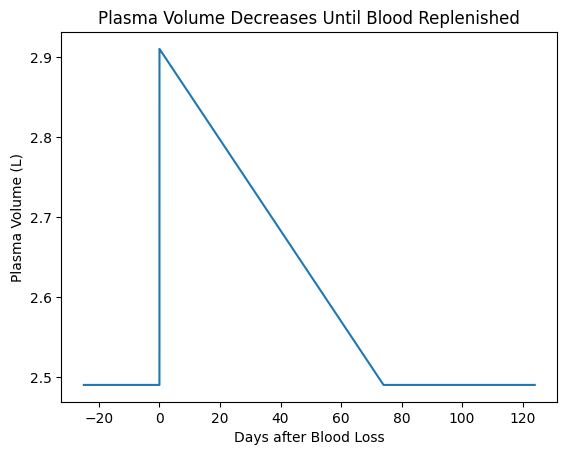

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def plasma_volume(t):
    def ss_volume(t):
        return plasma_final
        
    def dynamic_volume(t):
        new_volume = plasma_initial - (plasma_initial - plasma_final)*t/(time_to_correct_days)
        return new_volume
    return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [ss_volume, dynamic_volume, ss_volume])

plasma_volume_arr = [plasma_volume(t) for t in t]
plt.plot(t, plasma_volume_arr)
plt.xlabel('Days after Blood Loss')
plt.ylabel('Plasma Volume (L)')
plt.title('Plasma Volume Decreases Until Blood Replenished')

### Degradation Rate 

$ \dot D(t) = \bold{0.10 ~\mu M/min} * \frac{V_{old, plasma}}{V_{new, plasma}(t)}*V_{old, plasma}*\frac{1}{4*270*10^6}*(10^{-6})*(6.022*10^{23})*60*24 ~ RBC/day$ 

In [106]:
import numpy as np

heme_ss = 21 # uM    
deg_rate = 0.10    
plasma_initial = 2.91
plasma_final = 2.49                       

def degradation_rate(time):
    # heme is in uM
    Km = 0.93 #uM
    kcat = 3.5 #1/min
    HO1 = 0.0332 # uM
    heme = 21
    rate_uM_min = (kcat * heme * HO1) / (Km + heme) # uM/min
    
    return rate_uM_min * plasma_volume(time) * Avogadro_num / ( (4 * 270*10**6) * (10 ** 6) * 60 ) # RBC / sec

def p_volume(t):
    
        new_volume = plasma_initial - (plasma_initial - plasma_final)*t/(time_to_correct_days)        
        return new_volume

def rate_D(time):
    def rate_D_before(time):

        
        fractional_volume = plasma_final / p_volume(time)
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val

    def rate_D_after(time):

        fractional_volume = plasma_final / plasma_final
        convert_min_to_day = 60 * 24
            
        val = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
        return val
    return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [rate_D_after, rate_D_before, rate_D_after])
    
def rate_D_integral_before(time):
    D0 = 0

    convert_min_to_day = 60 * 24
    a = (plasma_initial - plasma_final)/(time_to_correct_days)
    fractional_volume = plasma_initial / p_volume(t)
    k = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    
    constant_D_before = D0 + (k * np.log(plasma_initial) / a)
    return (-k * np.log(np.absolute(plasma_initial - a*time)) / a) + constant_D_before

def rate_D_integral_after(time):
    D0 = 0

    convert_min_to_day = 60 * 24
    fractional_volume = plasma_initial / plasma_final
    k = deg_rate * fractional_volume * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
    
    constant_D_after = D0
     
    return (k * time / plasma_final) + constant_D_after

### Synthesis Rate

$$ \dot S(t) = {synth_{max}} - \frac{(synth_{max}) - (synth_{ss})}{1 + exp{(-r(x - t_{switch})})}$$

In [107]:

synth_rate_max = 0.14 * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
synth_rate = 199930400000.0 # RBC/day
synth_rate_ss = synth_rate
print(synth_rate_max - synth_rate)

def rate_S(t):
    t_switch = 50 # parameter to fit to data
    r = .29 # parameter to fit to data
    def rate_S_steadystate(t):
        return synth_rate_ss
    def rate_S_dynamic(t):
        return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
    return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [rate_S_steadystate, rate_S_dynamic, rate_S_steadystate])

def S(time):
    def S_steadystate(t):
        return synth_rate_ss * t
    def S_dynamic(t):
        S0 = 0
        constant_S = S0 + ((synth_rate_max-synth_rate_ss)*np.log(np.abs(1+np.exp(t_switch))))
        return (synth_rate_max * t) - (((synth_rate_max-synth_rate_ss)/r)*np.log(np.abs(1+np.exp(-r*(t+t_switch))))) - (synth_rate_max-synth_rate_ss)*t + ((synth_rate_max-synth_rate_ss)*t_switch) + constant_S
    
    return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [S_steadystate, S_dynamic, S_steadystate])

# print(f'{synth_rate*time_to_correct_days:,}')
# print(f'{rate_D_before(0):,.0f}')

79972160000.0


ending deg rate: 199930400000.0
199930400000.0
189150753202.6186
Total RBC added: 4.751561E+12


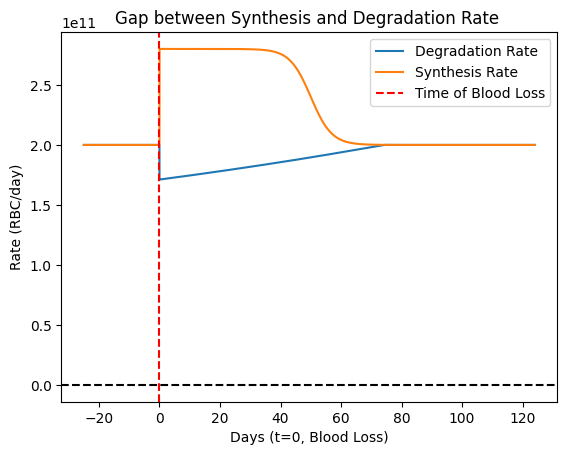

In [108]:
# deg_rate_before_arr = rate_D_before(t_before)
# deg_rate_after_arr = np.resize(rate_D_after(t_after), len(t_after))
# deg_rate_arr = np.concatenate((deg_rate_before_arr, deg_rate_after_arr), axis=0)
# synth_rate_before_arr = rate_S_before(t_before)
# synth_rate_after_arr = np.resize(rate_S_after(t_after), len(t_after))
# synth_rate_arr = np.concatenate((synth_rate_before_arr, synth_rate_after_arr), axis=0)

deg_rate_arr = rate_D(t)
synth_rate_arr = rate_S(t)

plt.plot(t, deg_rate_arr, label='Degradation Rate')
plt.plot(t, synth_rate_arr, label='Synthesis Rate')

plt.xlabel('Days (t=0, Blood Loss)')
plt.ylabel('Rate (RBC/day)')
plt.title('Gap between Synthesis and Degradation Rate ')
plt.axvline(x=0, color='r', linestyle='--', label='Time of Blood Loss')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()

print(f'ending deg rate: {deg_rate_arr[-1]:}')
print(synth_rate_arr[-1])
print(deg_rate_arr[len(t_before)-1])
# assert synth_rate_arr[-1]-deg_rate_arr[-1] == 0

total_RBC_added = 0
for i, time in enumerate(t_before):
    if i == 0:
        continue
    total_RBC_added += (synth_rate_arr[i] - deg_rate_arr[i]) * (t[i]-t[i-1])

print(f'Total RBC added: {total_RBC_added:2E}')

## Find the parameters of Synth needed to reach RBC restoration by time_to_correct_days

In [109]:
# needed earlier values
synth_rate_max = 0.12 * plasma_final * convert_num_heme_to_RBC * (10**(-6)) * Avogadro_num * convert_min_to_day
synth_rate = 199930400000.0 # RBC/day
synth_rate_ss = synth_rate

# loop over the specified ranges with a precision of 2?
arbitrary_step_size = 250

t_switch_min, t_switch_max = 40, time_to_correct_days-10
t_ranges = np.linspace(t_switch_min, t_switch_max, arbitrary_step_size)

r_min, r_max = .1, .4 
r_ranges = np.linspace(r_min, r_max, arbitrary_step_size)

expected_val = 4666666666666.664
smallest_dif = 1e12
t_num_fit = -1


# Let's test t_switch first which has the highest magnitude of change.
for t_num in t_ranges:
    t_switch = t_num # parameter to fit to data
    r = .29 # parameter to fit to data
    def rate_S(t):
        def rate_S_steadystate(t):
            return synth_rate_ss
        def rate_S_dynamic(t):
            return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
        return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [rate_S_steadystate, rate_S_dynamic, rate_S_steadystate])

    synth_rate_arr = rate_S(t)
    total_RBC_added = 0
    for i, time in enumerate(t_before):
        if i == 0:
            continue
        total_RBC_added += (synth_rate_arr[i] - deg_rate_arr[i]) * (t[i]-t[i-1])
    
    if abs(expected_val - total_RBC_added) < smallest_dif:
        smallest_dif = abs(expected_val - total_RBC_added)
        t_num_fit = t_num
        
print(t_num_fit, smallest_dif)



40.0 84894529485.93848


In [ ]:
for r_num in r_ranges:
    t_switch = t_num_fit # parameter to fit to data
    r = r_num # parameter to fit to data
    def rate_S(t):
        def rate_S_steadystate(t):
            return synth_rate_ss
        def rate_S_dynamic(t):
            return synth_rate_max - ((synth_rate_max - synth_rate) / (1 + np.exp(-r*(t - t_switch))))
        return np.piecewise(t, [t < 0, t >= 0, t >= time_to_correct_days], [rate_S_steadystate, rate_S_dynamic, rate_S_steadystate])

    total_RBC_added = 0
    for i, time in enumerate(t_before):
        if i == 0:
            continue
        total_RBC_added += (synth_rate_arr[i] - deg_rate_arr[i]) * (t[i]-t[i-1])
    
    if abs(expected_val - total_RBC_added) < smallest_dif:
        smallest_dif = abs(expected_val - total_RBC_added)
        t_num_fit = t_num
        
print(t_num_fit, smallest_dif)

### RBC Acc. Function

$ \dot{ACC} = \dot{S} - \dot{D} $

Target:
$\int_0^{t_f} \dot S(t)dt - \int_0^{t_f} \dot D(t)dt = N(t_f) = 4.67 * 10^{12} ~RBC$

(1595,)
(1000,)
(595,)


Text(0.5, 0, 'Days after Blood Loss')

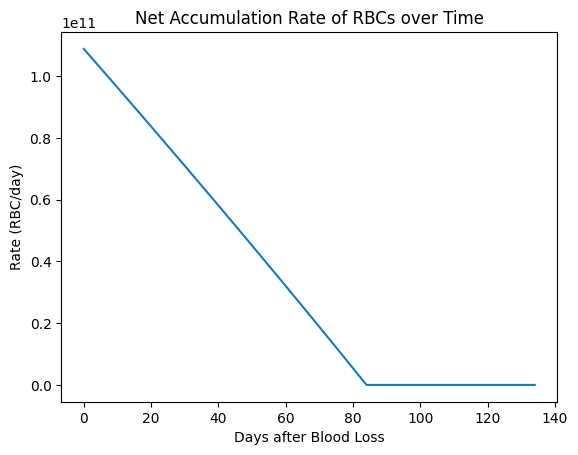

In [74]:
s_arr_before = rate_S_before(t_before)
s_arr_after = rate_S_after(t_after)
if isinstance(s_arr_after, (int, float)):
    s_arr_after = np.resize(s_arr_after, len(t_after))
print(s_arr.shape)

d_arr_before = rate_D_before(t_before)
d_arr_after = rate_D_after(t_after)
if isinstance(d_arr_after, (int, float)):
    d_arr_after = np.resize(d_arr_after, len(t_after))
print(d_arr_before.shape)
print(d_arr_after.shape)

d_arr = np.concatenate((d_arr_before, d_arr_after), axis=0)
s_arr = np.concatenate((s_arr_before, s_arr_after), axis=0)

diff = s_arr - d_arr
plt.plot(t, diff)
plt.title('Net Accumulation Rate of RBCs over Time')
plt.ylabel('Rate (RBC/day)')
plt.xlabel('Days after Blood Loss')
# plt.plot(t, s_arr, linestyle='--', color='r')
# plt.plot(t, d_arr, linestyle='--', color='g')

###  RBCs Function

In [79]:
# Correct Integration
# Accounts for non-linearity in Degradation
RBC_final = BV_ss*Ht_ss/MCV
RBC_initial = BV_ss*Ht_new/MCV
RBC_diff = -BV_ss*Ht_new/MCV + BV_ss*Ht_ss/MCV
print(RBC_final)


s_int = synth_rate*t

d_int_before = rate_D_integral_before(t_before)
d_int_after = rate_D_integral_after(t_after)
print(type(d_int_before)), type(d_int_after)
d_int = np.concatenate((d_int_before, d_int_after), axis=0)

diff = s_int - d_int

RBC_initial = BV_ss*Ht_new/MCV
y_arr = np.zeros(len(t))
y_arr[0] = RBC_initial

track_num = 0
for i, _ in enumerate(t_before):
    if i == 0:
        continue
    y_arr[i] = y_arr[i-1] + (s_int[i] - s_int[i-1] - d_int[i] + d_int[i-1])
    track_num = i
for i, _ in enumerate(t_after):
    y_arr[i+len(t_before)] = y_arr[track_num]

plt.plot(t, y_arr)
plt.ylabel('RBC Count (cells)')
plt.title('Total Red Blood Cell Count')
plt.xlabel('Days after Blood Loss')
plt.axhline(y=RBC_initial, color='r', linestyle='--')
plt.axhline(y=RBC_final, color='g', linestyle='--')

# plt.plot(t_before,lin_func(t_before), color='orange')
# plt.plot(t_after, np.resize([RBC_final], len(t_after)), color='orange')

print(f'{rate_D_integral_before(time_to_correct_days) - rate_S_integral(time_to_correct_days):,}')

20066666666666.664


ValueError: operands could not be broadcast together with shapes (1595,) (1000,) 

In [ ]:
heme_flow_rate = 3.6*10**(-4)
conversion_factor = 1/(heme_count/Avogadro_num) # mol heme per RBC

print(heme_flow_rate*conversion_factor/Avogadro_num)

heme_moles = heme_count/Avogadro_num # heme moles / RBC
g_RBC = heme_moles*heme_molar # g/RBC

print(200*10**9*g_RBC*1000)
print(175*10**9*g_RBC*1000)

excess_molar = heme_molar - Fe_molar # g/mol
excess_g_RBC = (heme_moles*(heme_molar-Fe_molar)) # g excess / RBC degraded
print(200*10**9*excess_g_RBC/excess_molar)
print(175*10**9*excess_g_RBC/excess_molar)


3.333333333333334e-13
221.1245300564596
193.48396379940218
0.0003586848223181667
0.00031384921952839584
